In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [ ]:
!pip install geopandas

Training Sets

In [5]:
NY_pickle = '/content/drive/MyDrive/Spring 2022/ML Final/Project Files/Urban-Mobility-Index/Data/Training/NYC/Intersections/Density.pkl'
NY = pd.read_pickle(NY_pickle)

In [6]:
SF_pickle = '/content/drive/MyDrive/Spring 2022/ML Final/Project Files/Urban-Mobility-Index/Data/Training/SF/Intersections/Density.pkl'
SF = pd.read_pickle(SF_pickle)

In [7]:
Ann_pickle = '/content/drive/MyDrive/Spring 2022/ML Final/Project Files/Urban-Mobility-Index/Data/Training/Ann Arbor/Intersections/Density.pkl'
Ann = pd.read_pickle(Ann_pickle)

In [9]:
Boulder_pickle = '/content/drive/MyDrive/Spring 2022/ML Final/Project Files/Urban-Mobility-Index/Data/Training/Boulder/Intersections/Density.pkl'
Boulder = pd.read_pickle(Boulder_pickle)

In [10]:
Chicago_pickle = '/content/drive/MyDrive/Spring 2022/ML Final/Project Files/Urban-Mobility-Index/Data/Training/Chicago/Intersections/Density.pkl'
Chicago = pd.read_pickle(Chicago_pickle)

In [11]:
DC_pickle = '/content/drive/MyDrive/Spring 2022/ML Final/Project Files/Urban-Mobility-Index/Data/Training/DC/Intersections/Density.pkl'
DC = pd.read_pickle(DC_pickle)

Test Sets

In [12]:
Madison_pickle = '/content/drive/MyDrive/Spring 2022/ML Final/Project Files/Urban-Mobility-Index/Data/Testing/Madison/Intersections/Density.pkl'
Madison = pd.read_pickle(Madison_pickle)

In [13]:
Seattle_pickle = '/content/drive/MyDrive/Spring 2022/ML Final/Project Files/Urban-Mobility-Index/Data/Testing/Seattle/Intersections/Density.pkl'
Seattle = pd.read_pickle(Seattle_pickle)

In [14]:
Tulsa_pickle = '/content/drive/MyDrive/Spring 2022/ML Final/Project Files/Urban-Mobility-Index/Data/Testing/Tulsa/Intersections/Density.pkl'
Tulsa = pd.read_pickle(Tulsa_pickle)

In [ ]:
!pip install fiona
!pip install folium
!pip install sodapy -q
!pip install adjustText
!pip install plotly --upgrade
!pip install contextily
!pip install mapclassify
!pip install chart-studio
!sudo apt install libspatialindex-dev
!pip install rtree
!pip install pygeos

In [16]:
# To ignore unimporant system warnings
import warnings
warnings.filterwarnings("ignore")

# We will use Pandas, Numpy, and Matplotlib which is a package for visualization with Python
import pandas as pd
import numpy as np

# Load a required package 
# This is a library for accessing and parsing data through URLs
from urllib.parse import urlencode
import urllib.request, json 
from bs4 import BeautifulSoup # for web scraping
import fiona
import folium
import plotly.express as px
import adjustText as aT
import seaborn as sns # visualization styling package
import plotly.graph_objects as go
import urllib, json
import chart_studio.plotly as py
import chart_studio.tools as tls
import os
from sodapy import Socrata
from IPython.display import Image, display
from shapely.geometry import Polygon
import time
from shapely.geometry import shape
import contextily as ctx
import pickle

# A magic functin that renders the figure in a notebook 
%matplotlib inline 

from matplotlib import pyplot as plt
from shapely.geometry import Point


In [ ]:
NY.shape

(243, 9)

In [17]:
Training = [NY, SF, Ann, Boulder, Chicago, DC]
Training = pd.concat(Training)

In [18]:
Training

,Name,Walk Score,Population,area,geometry,Bus_perSqKm,Bus_perThouCap,Inter_perSqKm,Inter_perThouCap
0,Allerton,88,59555,3.367416,"POLYGON ((2153337.795 -113565.918, 2153313.465...",24.94493994530072,1.410460918478717,193.917212,10.964655
1,Alley Park,61,547,2.770032,"POLYGON ((2165353.077 -120844.320, 2165249.601...",12.63523521014425,63.98537477148081,71.840337,363.802559
2,Annadale,48,10021,3.430403,"POLYGON ((2138875.830 -155622.669, 2138460.507...",3.206620218794582,1.097694840834248,197.352899,67.558128
3,Arden Heights,43,10460,2.634694,"POLYGON ((2136919.560 -154780.303, 2136916.975...",2.277304656437946,0.5736137667304015,115.762987,29.158700
4,Arrochar,63,550,0.262906,"POLYGON ((2145888.615 -146706.838, 2145890.348...",22.82187665007125,10.90909090909091,281.469812,134.545455
...,...,...,...,...,...,...,...,...,...
44,Trinidad - Langston,83,14495,3.289564,"POLYGON ((1963467.691 -400792.191, 1963300.910...",3.343908456877138,0.758882373232149,378.469639,85.891687
45,U-Street,99,11427,1.023350,"POLYGON ((1958422.859 -402541.685, 1958398.928...",11.72618882424572,1.050144394854293,693.799505,62.133543
46,Van Ness - Forest Hills,73,13738,3.878738,"POLYGON ((1954101.203 -400479.380, 1953950.735...",1.289079240950565,0.3639539962148785,210.635548,59.470083
47,Woodley Park,76,6751,1.810651,"POLYGON ((1955640.175 -402888.340, 1955695.405...",5.522875501154832,1.481262035254036,311.490178,83.543179


In [19]:
Test = [Madison, Seattle, Tulsa]
Test = pd.concat(Test)

In [20]:
Training.to_csv('/content/drive/MyDrive/Spring 2022/ML Final/Project Files/Urban-Mobility-Index/Data/Training/Training_Data.csv')


In [50]:
Test.to_csv('/content/drive/MyDrive/Spring 2022/ML Final/Project Files/Urban-Mobility-Index/Data/Testing/Test_Data.csv')

In [ ]:
int_training = Training.drop(columns=['Name', 'geometry', 'Bus_perSqKm', 'Bus_perThouCap','Population','area','Inter_perThouCap'])

In [ ]:
int_training

,Walk Score,Inter_perSqKm
0,88,193.917212
1,61,71.840337
2,48,197.352899
3,43,115.762987
4,63,281.469812
...,...,...
44,83,378.469639
45,99,693.799505
46,73,210.635548
47,76,311.490178


In [ ]:
df = pd.DataFrame(int_training)

In [ ]:
df.dtypes

Walk Score        object
Inter_perSqKm    float64
dtype: object

In [ ]:
df["Walk Score"]= df["Walk Score"].astype(str).astype(int)
df["Inter_perSqKm"]= df["Inter_perSqKm"].astype(int)
print(df.dtypes)

Walk Score       int64
Inter_perSqKm    int64
dtype: object


In [ ]:
df= df.to_numpy()

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

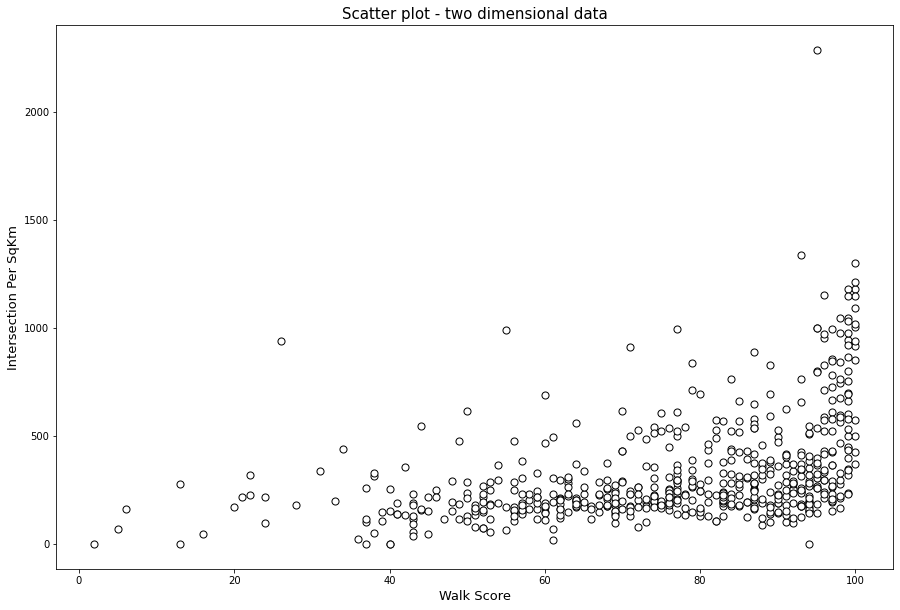

In [ ]:
# Scatter PLOT Intersection & Walk
plt.figure(figsize=(15,10))
plt.scatter(int_training['Walk Score'], int_training['Inter_perSqKm'],
           c='white', marker='o',
           edgecolor='black', s=50)

plt.xlabel('Walk Score', fontsize=13)
plt.ylabel('Intersection Per SqKm', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

DB SCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df)
labels = dbscan.labels_

In [ ]:
from collections import Counter
print (Counter(labels))
print (len(Counter(labels)))

Counter({-1: 584})
1


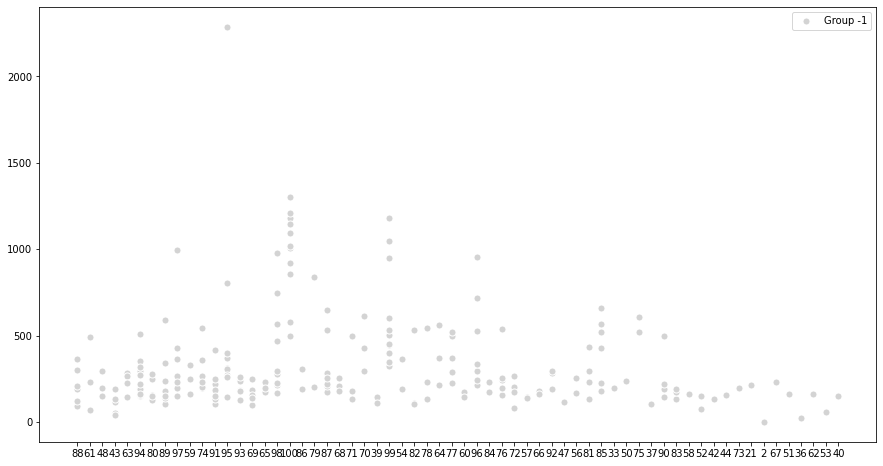

In [ ]:
# you can use for loops for labeling
colors = ['c', 'm', 'y', 'green','royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 
          'deeppink', 'orange', 'goldenrod', 'lightcyan', 'lightgrey'] # you can use any other colors

plt.figure(figsize=(15,8))
for i in list(Counter(labels).keys()):
    plt.scatter(NY['Walk Score'], NY['Inter_perSqKm'], s=50, c=colors[i], label ='Group %s'%(i),
               marker='o',
           edgecolor='white')

plt.legend()

In [ ]:
# Support Vector Machine

Support Vector Machine

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

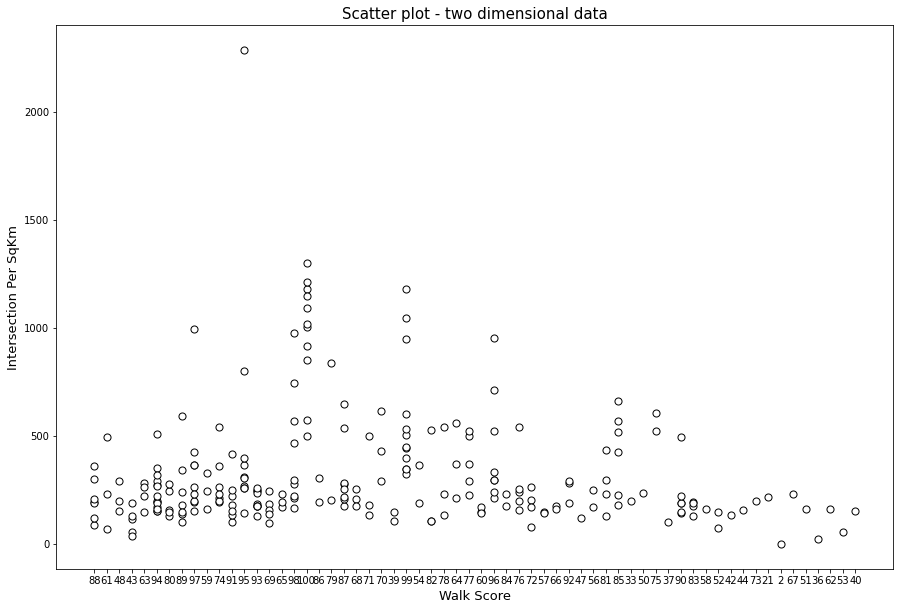

In [ ]:
# Scatter PLOT Intersection & Walk Score
plt.figure(figsize=(15,10))
plt.scatter(NY['Walk Score'], NY['Inter_perSqKm'],
           c='white', marker='o',
           edgecolor='black', s=50)

plt.xlabel('Walk Score', fontsize=13)
plt.ylabel('Intersection Per SqKm', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

In [ ]:
from sklearn import svm

In [ ]:
X=
Y=NY['Walk Score']

In [ ]:
# build your model and fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

ValueError: ignored

In [ ]:
#Kmeans

In [ ]:
df = pd.DataFrame(int_training)

In [ ]:
df.dtypes

Walk Score       int64
Inter_perSqKm    int64
dtype: object

In [ ]:
df.shape

(584, 2)

In [ ]:
df= df.to_numpy()

In [ ]:
df

array([[ 88, 193],
       [ 61,  71],
       [ 48, 197],
       ...,
       [ 73, 210],
       [ 76, 311],
       [ 57, 231]])

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

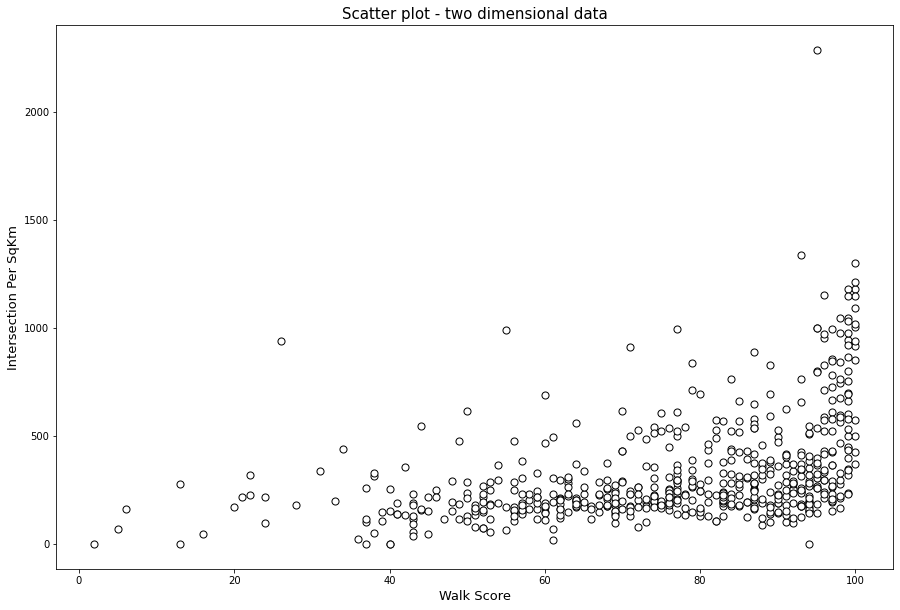

In [ ]:
# Scatter PLOT Intersection & Walk Score
plt.figure(figsize=(15,10))
plt.scatter(df[:,0], df[:,1],
           c='white', marker='o',
           edgecolor='black', s=50)

plt.xlabel('Walk Score', fontsize=13)
plt.ylabel('Intersection Per SqKm', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=10, random_state=0)

In [ ]:
group_km = km.fit_predict(df)

In [ ]:
print (group_km)

[5 8 5 8 9 3 2 2 1 5 2 5 0 2 9 2 9 5 8 5 8 5 8 4 9 9 8 2 9 5 5 2 9 5 2 5 0
 5 0 5 0 4 5 1 3 3 9 2 3 5 3 2 5 9 0 2 5 9 5 9 3 2 5 0 8 2 5 7 2 5 7 5 2 2
 2 3 5 5 4 5 3 2 5 3 2 9 9 5 2 8 2 5 9 9 2 0 3 9 3 9 5 5 5 2 9 5 1 2 2 9 5
 2 3 2 5 5 0 9 9 7 5 9 5 2 3 5 3 0 2 8 1 9 0 5 1 2 5 5 2 5 0 2 5 5 9 8 5 5
 2 9 9 2 3 5 2 2 9 4 4 9 5 5 5 0 2 2 7 5 5 5 5 7 8 3 5 2 5 2 2 5 9 5 5 2 8
 2 3 2 1 2 5 5 8 5 5 1 5 2 3 5 8 2 3 0 3 6 5 5 0 5 8 9 5 8 4 1 1 3 2 3 0 5
 8 5 5 8 3 2 5 0 1 2 3 3 5 2 5 0 5 5 5 0 2 1 0 8 3 7 0 2 2 7 5 1 3 0 1 1 5
 1 3 5 5 5 0 9 1 1 0 5 2 4 7 2 5 2 5 7 1 2 8 2 2 5 0 7 9 8 8 2 2 9 1 2 9 9
 9 9 2 8 7 5 3 0 3 2 8 9 7 2 7 7 2 5 5 2 2 3 1 2 9 9 0 5 2 5 8 5 7 3 5 8 0
 5 3 3 5 9 3 5 9 2 3 0 8 2 8 2 2 9 0 5 0 8 0 1 9 4 0 5 9 8 2 2 3 5 1 3 9 7
 2 8 3 9 8 0 3 3 2 3 3 9 0 5 8 2 0 7 8 2 8 5 5 9 5 5 5 5 9 1 5 5 5 5 2 9 0
 2 5 9 2 5 7 5 2 5 0 5 2 2 5 2 5 2 5 3 5 9 0 5 2 5 2 2 5 0 0 9 9 8 9 5 9 5
 5 5 2 0 2 3 5 0 2 1 2 8 2 2 3 0 9 8 2 5 2 9 9 2 3 5 5 9 2 5 5 2 2 9 9 5 1
 7 0 9 9 2 2 2 2 5 2 2 2 

In [ ]:
print (km.cluster_centers_)

[[  85.05084746  405.89830508]
 [  90.96296296  947.40740741]
 [  74.78571429  229.70634921]
 [  84.25        548.01923077]
 [  98.55555556 1194.11111111]
 [  69.75        166.29605263]
 [  95.         2287.        ]
 [  92.04        728.76      ]
 [  52.04651163   74.44186047]
 [  78.86666667  304.45555556]]


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Scatter plot - two dimensional data')

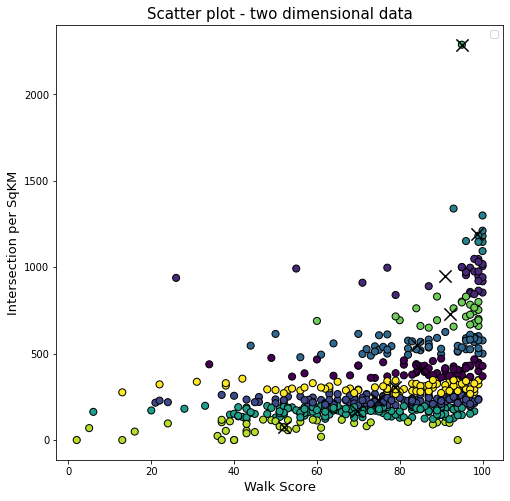

In [ ]:
# Plot X (two dimensional data) with different colors based on clustering labels
plt.figure(figsize=(8,8))
plt.scatter(df[:,0], df[:,1],
           c=group_km, 
           marker='o',
           edgecolor='black', s=50)
plt.legend()

# Plot the centroids of the clusters
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           s=150, marker='x',
           color='k')


plt.xlabel('Walk Score', fontsize=13)
plt.ylabel('Intersection per SqKM', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

In [ ]:
# Use for loops 
# Create an empty list to store total within sum of square values of each loop
wss = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        n_init=10, random_state=0
    )
    km.fit(df)
    wss.append(km.inertia_) # calculate sum of squared distances of samples to their closest cluster center and append to the list

Text(0.5, 1.0, 'Elbow test')

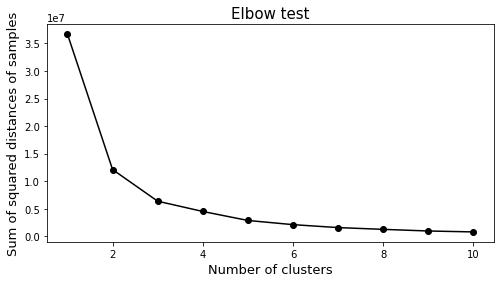

In [ ]:
# plot the elbow test results
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wss, marker='o', c='k')

plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Sum of squared distances of samples', fontsize=13)
plt.title('Elbow test', fontsize=15)

Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering # for clustering
import scipy.cluster.hierarchy as sch # for dendrogram

In [ ]:
df.shape

(150, 6)

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

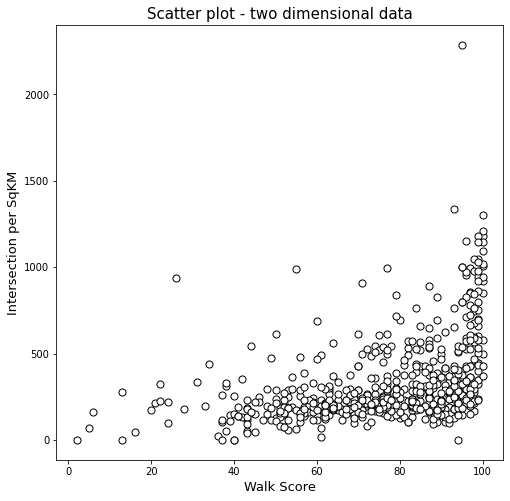

In [ ]:
# Plot X (two dimensional data)
plt.figure(figsize=(8,8))
plt.scatter(df[:,0], df[:,1],
           c='white', marker='o',
           edgecolor='black', s=50)

plt.xlabel('Walk Score', fontsize=13)
plt.ylabel('Intersection per SqKM', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

Text(0.5, 1.0, 'Dendrogram for determining optimal number of clusters')

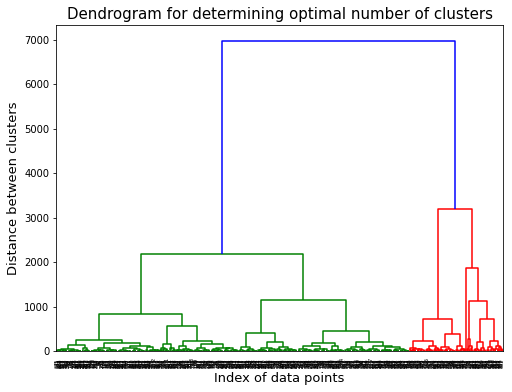

In [ ]:
#Dendrogram to determine optimal number of clusters
plt.figure(figsize=(8,6))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.xlabel("Index of data points", fontsize=13)
plt.ylabel("Distance between clusters", fontsize=13)
plt.title("Dendrogram for determining optimal number of clusters", fontsize=15)

In [ ]:
model= AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')

model.fit(df)
labels= model.labels_

In [ ]:
print(labels)

[7 0 7 0 1 8 1 1 5 0 1 0 2 1 1 7 1 0 0 7 0 7 0 6 1 1 0 7 1 0 7 1 1 0 1 7 2
 7 2 0 2 6 7 5 8 8 2 7 8 0 8 1 7 1 2 7 7 1 7 1 3 7 0 2 0 1 7 3 1 7 4 0 7 7
 1 8 0 7 6 7 8 1 0 3 1 2 1 0 1 0 1 0 1 1 1 2 3 1 3 1 7 7 7 7 1 7 5 1 7 2 0
 1 3 1 0 7 2 2 1 3 7 2 7 1 8 7 3 2 7 0 5 1 2 7 5 1 0 0 1 7 2 1 7 0 2 0 0 0
 1 1 1 1 8 7 1 7 1 6 6 2 7 0 0 2 1 1 4 0 0 7 7 3 0 8 0 1 7 1 7 7 2 0 7 1 0
 1 3 1 4 1 0 0 0 7 7 5 7 1 8 0 0 1 8 2 8 9 0 0 2 7 0 1 7 0 6 5 4 8 1 8 8 0
 0 0 7 0 8 1 7 2 5 1 8 8 7 1 0 2 0 7 0 2 1 4 2 0 3 3 2 1 1 4 0 4 3 2 5 5 7
 4 8 7 7 7 2 1 5 5 2 0 1 6 4 7 0 1 0 4 5 1 0 7 1 7 2 3 1 0 0 1 7 2 4 1 1 1
 1 2 1 0 4 0 3 2 3 1 0 1 3 1 4 3 1 7 7 7 1 3 5 1 2 2 2 0 1 0 0 0 3 3 7 0 2
 7 8 3 7 2 8 0 1 7 8 2 0 1 0 1 1 2 2 0 2 0 8 5 1 6 8 7 1 0 1 7 3 7 5 8 1 3
 7 0 8 2 0 2 8 3 1 8 8 1 2 0 0 1 2 3 0 7 0 7 7 1 7 7 7 0 1 5 7 0 7 0 7 2 2
 1 7 1 1 7 4 7 1 7 2 7 1 1 7 7 0 1 7 8 7 1 2 0 7 7 7 7 7 2 2 1 1 0 2 7 2 7
 7 7 7 2 7 8 0 2 7 5 7 0 1 1 8 8 1 0 1 7 7 1 1 1 8 7 7 1 7 7 7 1 7 1 1 0 5
 4 2 1 1 1 7 7 1 7 1 1 7 

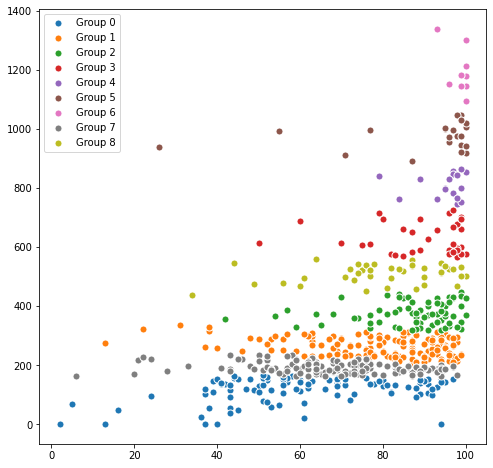

In [ ]:


plt.figure(figsize=(8,8))
for i in range(9):
    plt.scatter(df[labels==i, 0], df[labels==i, 1], s=50, 
                #c=colors[i],
               label = 'Group %s' %(i),
               marker='o', edgecolor='white')
plt.legend()

Gaussian Clustering

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=10, covariance_type='full')
gmm.fit(df)

GaussianMixture(n_components=10)

In [ ]:
probs = gmm.predict_proba(df)
print(probs.round(3))

[[0.315 0.    0.    ... 0.006 0.473 0.   ]
 [0.002 0.    0.    ... 0.879 0.    0.   ]
 [0.011 0.    0.    ... 0.008 0.    0.   ]
 ...
 [0.64  0.    0.    ... 0.005 0.    0.   ]
 [0.386 0.    0.023 ... 0.    0.002 0.   ]
 [0.252 0.    0.    ... 0.002 0.    0.   ]]


In [ ]:
labels = gmm.predict(df)
print (labels)

[8 7 4 4 5 2 0 8 9 8 0 4 5 8 8 0 8 8 4 4 7 8 8 9 8 8 7 0 8 4 8 0 8 4 0 8 2
 0 8 4 9 9 4 9 2 2 5 8 2 8 2 0 8 8 5 8 4 8 8 8 9 0 4 9 8 0 0 9 0 8 9 4 0 0
 8 2 4 4 9 8 9 0 4 6 8 8 8 4 8 4 5 8 0 8 0 5 2 8 9 0 4 4 8 4 8 4 9 8 4 8 8
 0 2 0 4 4 8 8 8 6 4 8 8 8 2 8 9 9 0 7 9 0 8 8 9 0 4 8 8 0 5 0 0 4 8 8 4 4
 8 8 8 8 9 4 0 4 5 9 9 8 8 4 4 8 8 8 9 8 4 8 4 6 4 2 4 8 0 0 4 8 8 8 4 8 7
 0 2 0 6 0 4 4 7 8 4 9 4 8 2 4 7 0 2 2 2 3 4 8 9 4 7 0 4 7 9 9 9 8 8 9 9 8
 7 8 8 4 9 0 8 8 9 8 2 2 4 8 4 8 8 0 4 8 8 9 8 8 6 6 8 8 0 6 4 9 9 8 9 9 4
 9 2 8 4 4 8 8 9 9 8 8 8 9 9 0 4 0 4 9 9 8 7 0 0 8 9 9 5 8 7 8 4 8 9 8 8 8
 5 5 0 4 9 4 6 9 9 8 4 8 9 8 9 9 0 8 8 0 8 9 1 0 5 8 9 4 8 8 7 8 6 9 0 4 8
 8 2 9 0 8 2 4 0 0 9 8 7 8 7 0 0 8 9 4 2 7 2 1 5 9 2 4 5 7 5 4 2 4 6 2 5 2
 5 7 2 5 7 5 2 2 5 2 2 5 2 4 7 5 2 6 7 4 4 4 4 0 4 4 4 4 5 1 4 4 4 4 4 8 8
 5 4 5 8 4 6 4 0 4 8 4 0 0 4 4 4 0 4 2 0 0 8 4 4 0 0 4 0 8 5 5 8 4 8 4 8 4
 4 4 4 8 0 2 4 8 0 9 4 7 0 0 2 2 8 7 0 4 0 0 8 0 9 0 4 8 4 4 0 0 0 0 5 4 9
 6 8 8 0 0 4 4 0 4 8 0 4 

In [ ]:
# Computing distribution for contour lines
X, Y = np.meshgrid(np.linspace(-4, 4), np.linspace(-1,10)) # rectengular grid
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape(X.shape)

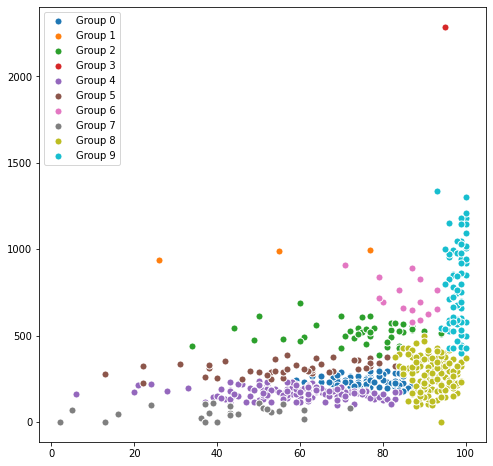

In [ ]:
# you can use for loops for labeling
colors = ['c', 'm', 'y', 'green'] # you can use any other colors

plt.figure(figsize=(8,8))
for i in range(10):
    plt.scatter(df[labels==i, 0], df[labels==i, 1], s=50,
                #c=colors[i], 
                label ='Group %s'%(i),
               marker='o',
           edgecolor='white')
    
#plt.contour(X, Y, Z, 20, colors='k')

plt.legend()

In [ ]:
import plotly.express as px

fig = px.scatter(Training, x="Walk Score", y="Inter_perSqKm", color='Walk Score')
fig.show()

In [ ]:
iris=px.data.iris()
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [ ]:
Training.head()

,Name,Walk Score,Population,area,geometry,Bus_perSqKm,Bus_perThouCap,Inter_perSqKm,Inter_perThouCap
0,Allerton,88,59555,3.367416,"POLYGON ((2153337.795 -113565.918, 2153313.465...",24.94493994530072,1.410460918478717,193.917212,10.964655
1,Alley Park,61,547,2.770032,"POLYGON ((2165353.077 -120844.320, 2165249.601...",12.63523521014425,63.98537477148081,71.840337,363.802559
2,Annadale,48,10021,3.430403,"POLYGON ((2138875.830 -155622.669, 2138460.507...",3.206620218794582,1.097694840834248,197.352899,67.558128
3,Arden Heights,43,10460,2.634694,"POLYGON ((2136919.560 -154780.303, 2136916.975...",2.277304656437946,0.5736137667304015,115.762987,29.158700
4,Arrochar,63,550,0.262906,"POLYGON ((2145888.615 -146706.838, 2145890.348...",22.82187665007125,10.90909090909091,281.469812,134.545455


In [25]:
def Classification(df):  
  df["Class"] = ""
  df['Walk Score'] = df['Walk Score'].astype(int)

  dfclass = {
    91: "91-100",
    81: "81-90",
    71: "71-80",
    61: "61-70",
    51: "51-60",
    41: "41-50",
    31: "31-40",
    21: "21-30",
    11: "11-20",
    0: "0-10",}
    
  def ClassMap(value):
      for key, score in dfclass.items():
        if value >= key:
          return score

  class_name = df["Walk Score"].map(ClassMap)
  df["Class"] = pd.Categorical(class_name, categories=dfclass.values(), ordered=True)
  return df

In [26]:
Training_Class = Classification(Training)

In [27]:
Training_Class

,Name,Walk Score,Population,area,geometry,Bus_perSqKm,Bus_perThouCap,Inter_perSqKm,Inter_perThouCap,Class
0,Allerton,88,59555,3.367416,"POLYGON ((2153337.795 -113565.918, 2153313.465...",24.94493994530072,1.410460918478717,193.917212,10.964655,81-90
1,Alley Park,61,547,2.770032,"POLYGON ((2165353.077 -120844.320, 2165249.601...",12.63523521014425,63.98537477148081,71.840337,363.802559,61-70
2,Annadale,48,10021,3.430403,"POLYGON ((2138875.830 -155622.669, 2138460.507...",3.206620218794582,1.097694840834248,197.352899,67.558128,41-50
3,Arden Heights,43,10460,2.634694,"POLYGON ((2136919.560 -154780.303, 2136916.975...",2.277304656437946,0.5736137667304015,115.762987,29.158700,41-50
4,Arrochar,63,550,0.262906,"POLYGON ((2145888.615 -146706.838, 2145890.348...",22.82187665007125,10.90909090909091,281.469812,134.545455,61-70
...,...,...,...,...,...,...,...,...,...,...
44,Trinidad - Langston,83,14495,3.289564,"POLYGON ((1963467.691 -400792.191, 1963300.910...",3.343908456877138,0.758882373232149,378.469639,85.891687,81-90
45,U-Street,99,11427,1.023350,"POLYGON ((1958422.859 -402541.685, 1958398.928...",11.72618882424572,1.050144394854293,693.799505,62.133543,91-100
46,Van Ness - Forest Hills,73,13738,3.878738,"POLYGON ((1954101.203 -400479.380, 1953950.735...",1.289079240950565,0.3639539962148785,210.635548,59.470083,71-80
47,Woodley Park,76,6751,1.810651,"POLYGON ((1955640.175 -402888.340, 1955695.405...",5.522875501154832,1.481262035254036,311.490178,83.543179,71-80


In [40]:
Test_Class = Classification(Test)

In [41]:
Test_Class

,Name,Walk Score,Population,area,geometry,Bus_perSqKm,Bus_perThouCap,Inter_perSqKm,Inter_perThouCap,Class
0,Bay Creek,71,2466,1.528023,"POLYGON ((858192.373 -160483.667, 858000.216 -...",8.507725646189126,5.27169505271695,590.305272,365.774534,71-80
1,Berkeley Oaks,54,1875,0.985258,"POLYGON ((860282.943 -151710.389, 860220.859 -...",13.19452006013636,6.933333333333334,288.249515,151.466667,51-60
2,Brentwood Village,60,1197,0.433334,"POLYGON ((859768.837 -152703.831, 859755.604 -...",0,0,216.922751,78.529657,51-60
3,Burke Heights,28,645,0.994786,"POLYGON ((864211.772 -153485.355, 864197.439 -...",2.010483566418229,3.10077519379845,125.655223,193.798450,21-30
4,Carpenter-Ridgeway,51,678,0.552770,"POLYGON ((863206.028 -154003.461, 862619.050 -...",3.618138613632968,2.949852507374631,271.360396,221.238938,51-60
...,...,...,...,...,...,...,...,...,...,...
66,Wagon Wheel,24,1204,0.697446,"POLYGON ((373029.248 -973741.409, 372828.727 -...",1.433803035675063,0.8305647840531561,106.101425,61.461794,21-30
67,Western Village,30,1291,0.996692,"POLYGON ((373396.425 -972953.888, 373387.338 -...",2.006638751596974,1.549186676994578,114.378409,88.303641,21-30
68,Xyler,20,2378,1.086307,"POLYGON ((365218.448 -969685.428, 366824.483 -...",2.761649928356952,1.261564339781329,108.624897,49.621531,11-20
69,Yorktown,72,764,0.516073,"POLYGON ((363487.061 -976096.966, 363484.524 -...",7.75084688493524,5.235602094240837,457.299966,308.900524,71-80


In [52]:
Test_Class.to_csv('Test_Class.csv')

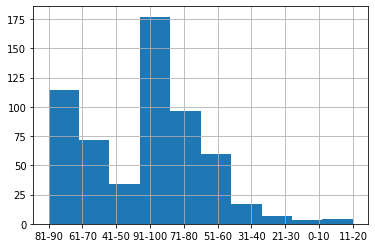

In [36]:
Training_Class['Class'].hist()

In [37]:
import plotly.figure_factory as ff
import numpy as np

In [55]:
x1 = [Training_Class, x="Class"]
x2 = [Test_Class, x="Class"]

hist_data = [x1, x2]

group_labels = ['Training', 'Test']
colors = ['#835AF1', '#7FA6EE']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors, bin_size=.25,
                         show_curve=False)

# Add title
fig.update_layout(title_text='Hist and Rug Plot')
fig.show()

SyntaxError: ignored

In [57]:
fig = px.histogram(Training_Class, x="Class", nbins=10, title="Visitors per region")
fig.show()